# Image Classification Challenge

In [18]:
##################################################
# Imports
##################################################

import numpy as np
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm, metrics


##################################################
# Params
##################################################

DATA_BASE_FOLDER = 'data'

# Dataset

The dataset contains 50k train + 10k validation images of 10 different categories ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot').

Each image is a 28x28 grayscale, and for simplicity here is flattened into a 784 dimensional vector.

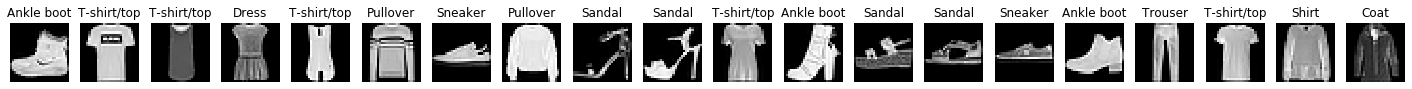

In [15]:
##################################################
# Load dataset
##################################################

x_train = np.load(os.path.join(DATA_BASE_FOLDER, 'train.npy'))
x_valid = np.load(os.path.join(DATA_BASE_FOLDER, 'validation.npy'))
x_test = np.load(os.path.join(DATA_BASE_FOLDER, 'test.npy'))
y_train = pd.read_csv(os.path.join(DATA_BASE_FOLDER, 'train.csv'))['class'].values
y_valid = pd.read_csv(os.path.join(DATA_BASE_FOLDER, 'validation.csv'))['class'].values
y_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot random images of different classes
plt.figure(figsize=(25, 5))
for idx in range(20):
    plt.subplot(1, 20, idx + 1)
    img = x_train[idx].reshape(28, 28)
    plt.title(f'{y_labels[y_train[idx]]}')
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

In [16]:
# data is stored in integer values
print(x_train[0].dtype)

# print data shape
print(x_train.shape)

uint8
(50000, 784)


In [19]:
##################################################
# Process the data here, if needed
##################################################

# Normalize data. We can normalize in different ways

# 1 - in such a way that feature vectors have norm 1
x_train_n1 = preprocessing.normalize(x_train, axis=1)
x_valid_n1 = preprocessing.normalize(x_valid, axis=1)
x_test_n1 = preprocessing.normalize(x_test, axis=1)
print("norm of x_train_n1: {}".format(np.linalg.norm(x_train_n1[0])))
print("max of x_train_n1[0]: {}, min of x_train_n1[0]: {}".format(max(x_train_n1[0]), min(x_train_n1[0])))



# 2 - simply rescaling pixel values from 0-255 to 0-1
x_train_n2 = x_train / 255.0
x_valid_n2 = x_valid / 255.0
x_test_n2 =  x_test / 255.0
print("norm of x_train_n2: {}".format(np.linalg.norm(x_train_n2[0])))
print("max of x_train_n2[0]: {}, min of x_train_n2[0]: {}".format(max(x_train_n2[0]), min(x_train_n2[0])))

norm of x_train_n1: 1.0
max of x_train_n1[0]: 0.06468900181277835, min of x_train_n1[0]: 0.0
norm of x_train_n2: 15.458578305075418
max of x_train_n2[0]: 1.0, min of x_train_n2[0]: 0.0


# Model

Here you have to implement a model (or more models, for finding the most accurate) for classification.

You can use the [`sklearn`](https://scikit-learn.org/stable/) (or optionally other more advanced frameworks such as [`pytorch`](https://pytorch.org/) or [`tensorflow`](https://www.tensorflow.org/)) package that contains a pool of models already implemented that perform classification. (SVMs, NNs, LR, kNN, ...)

In [55]:
##################################################
# Implement you model here
##################################################

# test SVM brutale
classifier = svm.SVC()
classifier.fit(x_train_n1[:10000], y_train[:10000])

predicted = classifier.predict(x_valid_n1)

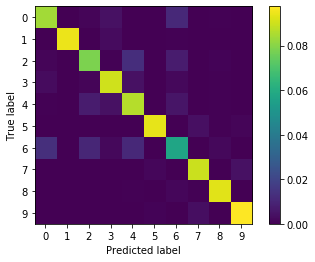

In [56]:
disp = metrics.plot_confusion_matrix(classifier, x_valid_n1, y_valid, normalize='all', include_values=False)

# Evaluation

In [57]:
##################################################
# Evaluate the model here
##################################################

# Use this function to evaluate your model
def accuracy(y_pred, y_true):
    '''
    input y_pred: ndarray of shape (N,)
    input y_true: ndarray of shape (N,)
    '''
    return (1.0 * (y_pred == y_true)).mean()

# Report the accuracy in the train and validation sets.

In [58]:
accuracy(predicted, y_valid)

0.8663

# Send the submission for the challenge

In [ ]:
##################################################
# Save your test prediction in y_test_pred
##################################################

y_test_pred = None

# Create submission
submission = pd.read_csv(os.path.join(DATA_BASE_FOLDER, 'sample_submission.csv'))
if y_test_pred is not None:
    submission['class'] = y_test_pred
submission.to_csv('my_submission.csv', index=False)